In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as _plot
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [ ]:
import os
from google.colab import files
uploaded = files.upload()
#print(os.listdir("C:\Users\91982\Documents\ML\MY_240\Project"))

Saving heart.csv to heart.csv


In [1]:
dataframe =  pd.read_csv("heart.csv")

NameError: name 'pd' is not defined

In [ ]:
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Data contains;

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

target - have disease or not (1=yes, 0=no)




**Data Exploration**

In [ ]:
dataframe.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
len(dataframe.index)

1025

<ipython-input-8-3afc45c39502>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=dataframe, palette="gray")


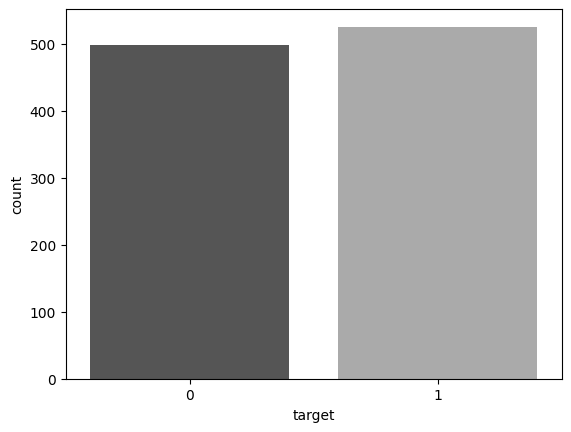

In [ ]:
sns.countplot(x="target", data=dataframe, palette="gray")
_plot.show()

# Database is balanced as there are almost similar no of 0/1 in target. If it was not balanced, then we would have used oversampling/undersampling techniques.
# SMOTE techniques to make unbalanced data to balanced so that results won't be skewed

In [ ]:
# count no of people with heart disease
# count no of people without heart disease
count_disease = len(dataframe[dataframe.target == 1])
count_nodisease = len(dataframe[dataframe.target == 0])
print("Patients that have heart Disease (in percent): {:.2f}%".format((count_disease/len(dataframe.target))*100))
print("Patients that do not have heart Disease (in percent): {:.2f}%".format((count_nodisease/len(dataframe.target))*100))


Patients that have heart Disease (in percent): 51.32%
Patients that do not have heart Disease (in percent): 48.68%


<ipython-input-10-5787da581e09>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sex", data=dataframe, palette="bwr")


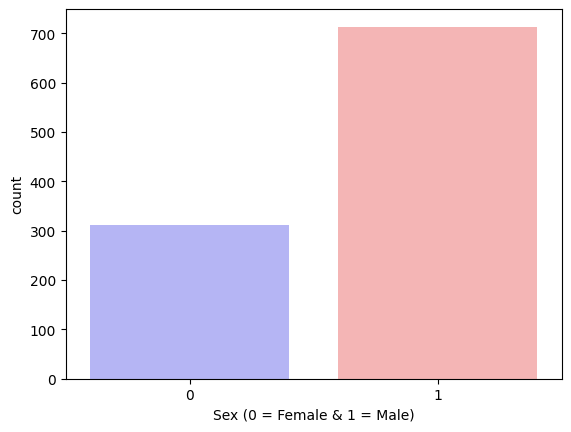

In [ ]:
sns.countplot(x="sex", data=dataframe, palette="bwr")
_plot.xlabel("Sex (0 = Female & 1 = Male)")
_plot.show()

In [ ]:
male = len(dataframe[dataframe.target == 1])
female = len(dataframe[dataframe.target == 0])
print("Percentage of patient that are male: {:.2f} %".format((male/len(dataframe.sex))*100))
print("Percentage of patient that are female: {:.2f} %".format((female/len(dataframe.sex))*100))


Percentage of patient that are male: 51.32 %
Percentage of patient that are female: 48.68 %


In [ ]:
dataframe.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


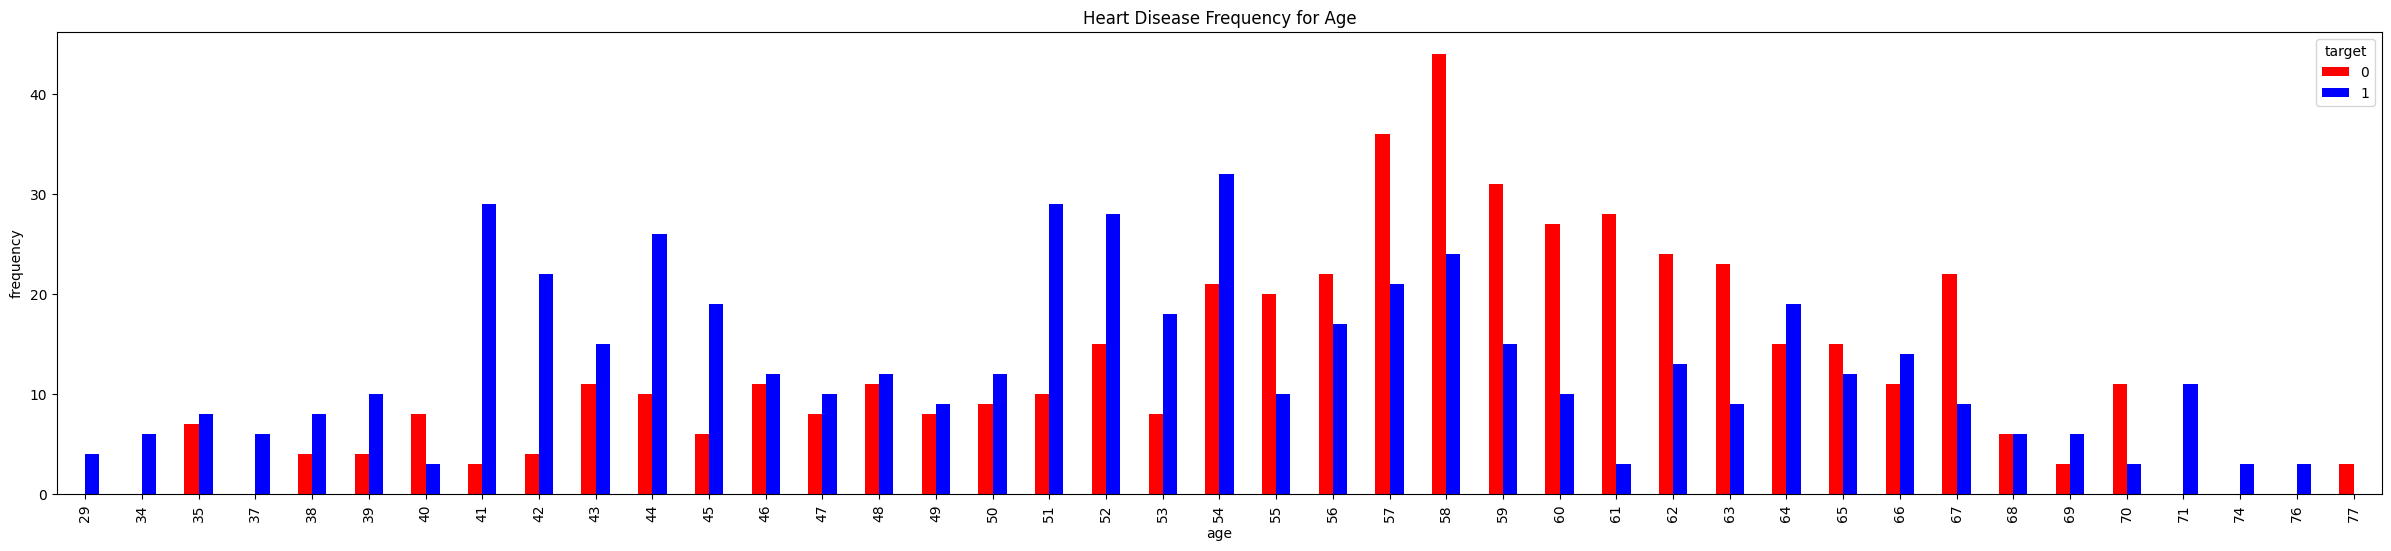

In [ ]:
pd.crosstab(dataframe.age,dataframe.target).plot(kind="bar", figsize=(30,6), color=['red','blue'])
_plot.title('Heart Disease Frequency for Age')
_plot.xlabel('age')
_plot.ylabel('frequency')
_plot.show()

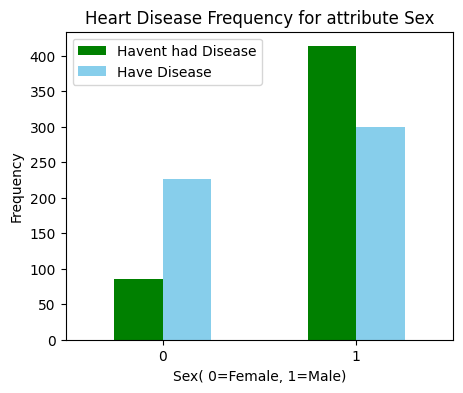

In [ ]:
pd.crosstab(dataframe.sex, dataframe.target).plot(kind="bar", figsize=(5,4), color=['green','skyblue'])
_plot.title('Heart Disease Frequency for attribute Sex')
_plot.xlabel('Sex( 0=Female, 1=Male)')
_plot.ylabel('Frequency')
_plot.legend(['Havent had Disease', 'Have Disease'])
_plot.xticks(rotation = 0)
_plot.show()

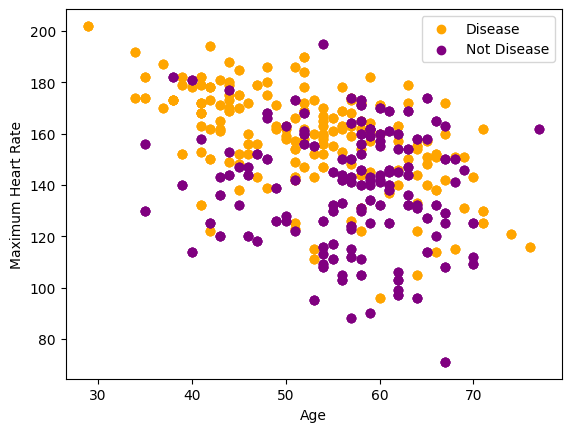

In [ ]:
_plot.scatter(x=dataframe.age[dataframe.target==1], y=dataframe.thalach[dataframe.target==1], c='orange')
_plot.scatter(x=dataframe.age[dataframe.target==0], y=dataframe.thalach[(dataframe.target==0)], c="purple")
_plot.legend(['Disease','Not Disease'])
_plot.xlabel('Age')
_plot.ylabel('Maximum Heart Rate')
_plot.show()

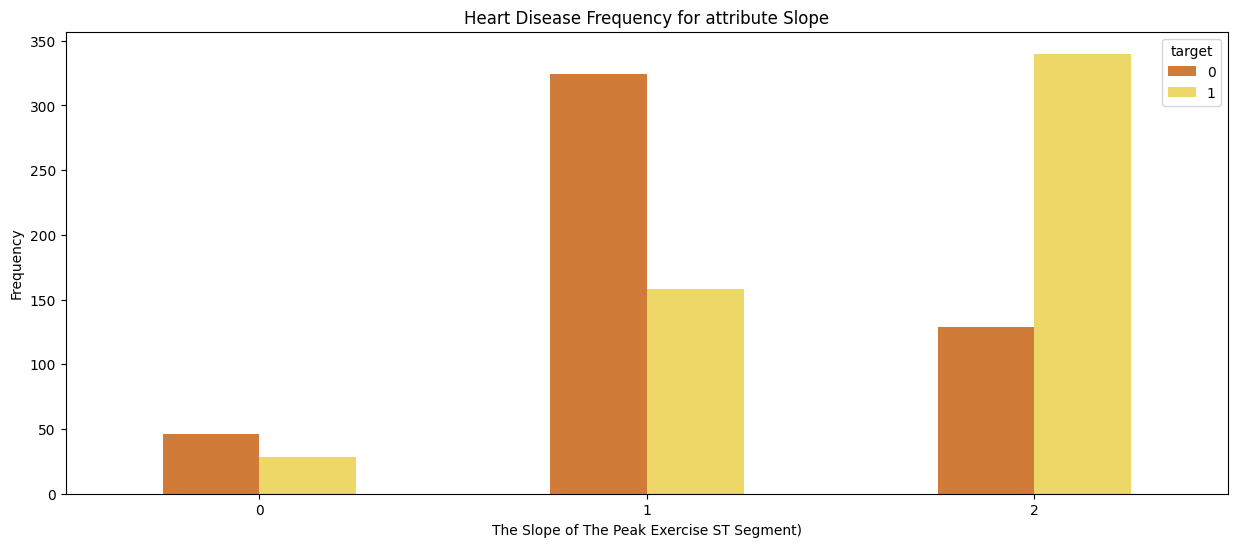

In [ ]:
pd.crosstab(dataframe.slope, dataframe.target).plot(kind="bar", figsize=(15,6), color=['#d17b38','#edd766'])
_plot.title('Heart Disease Frequency for attribute Slope')
_plot.xlabel('The Slope of The Peak Exercise ST Segment)')
_plot.ylabel('Frequency')

_plot.xticks(rotation = 0)
_plot.show()

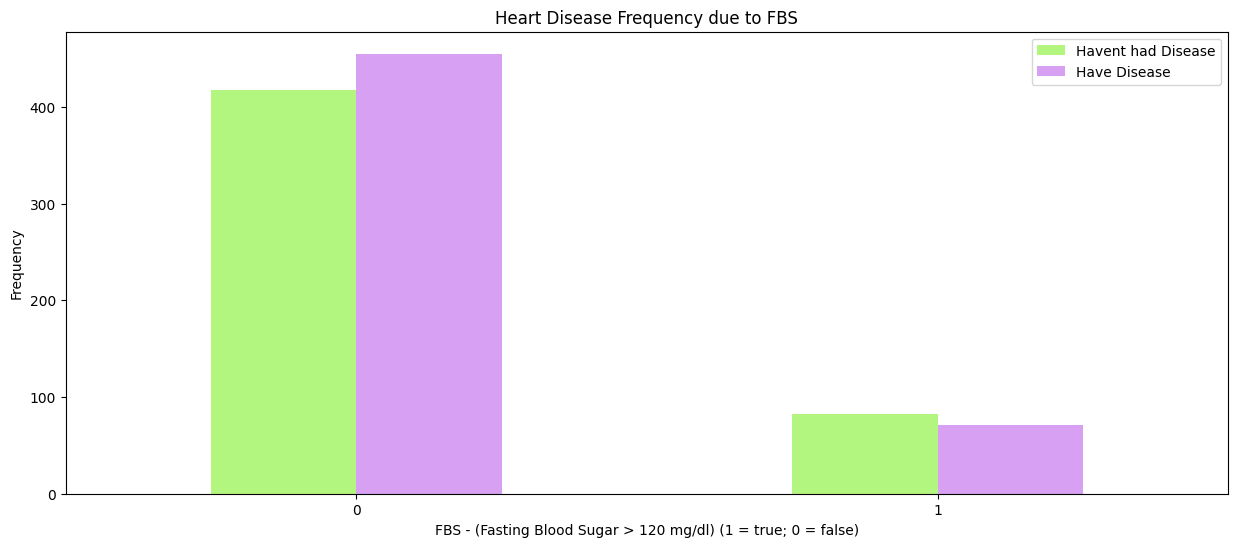

In [ ]:
pd.crosstab(dataframe.fbs, dataframe.target).plot(kind="bar", figsize=(15,6), color=['#b2f57f','#d8a0f2'])
_plot.title('Heart Disease Frequency due to FBS')
_plot.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
_plot.ylabel('Frequency')
_plot.legend(['Havent had Disease', 'Have Disease'])
_plot.xticks(rotation = 0)
_plot.show()

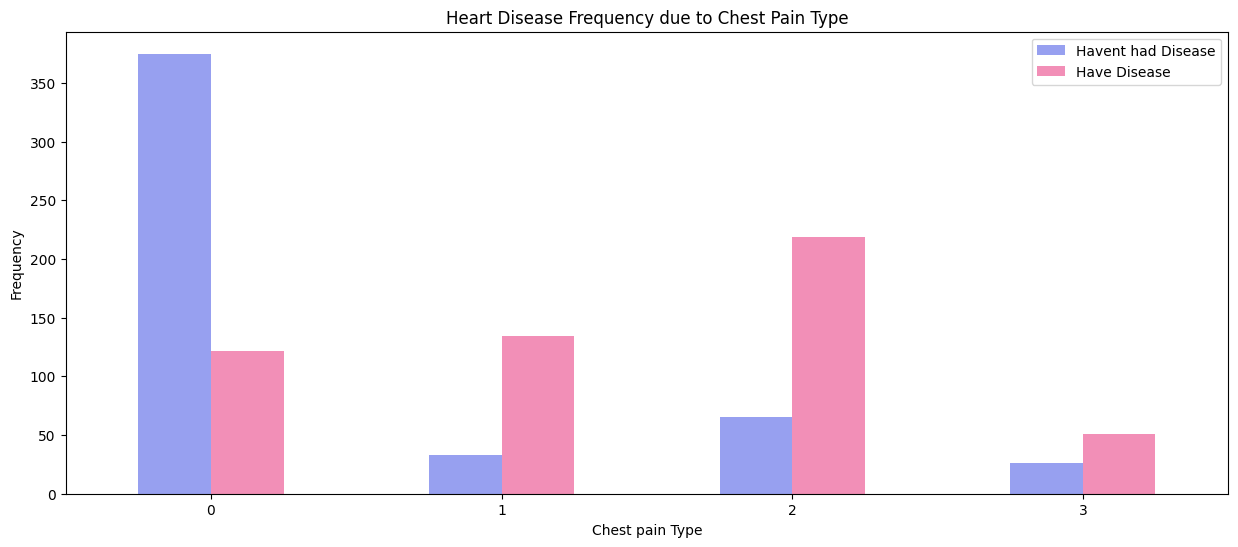

In [ ]:
pd.crosstab(dataframe.cp, dataframe.target).plot(kind="bar", figsize=(15,6), color=['#97a0f0','#f28fb7'])
_plot.title('Heart Disease Frequency due to Chest Pain Type')
_plot.xlabel('Chest pain Type')
_plot.ylabel('Frequency')
_plot.legend(['Havent had Disease', 'Have Disease'])
_plot.xticks(rotation = 0)
_plot.show()

**Creating dummy variables**

To handle the categorical variables 'cp', 'thal', and 'slope', we will convert them into dummy variables.

In [ ]:
a = pd.get_dummies(dataframe['cp'], prefix = "cp")
b = pd.get_dummies(dataframe['thal'], prefix = "thal")
c = pd.get_dummies(dataframe['slope'], prefix = "slope")

In [ ]:
frames = [dataframe, a, b, c]
dataframe = pd.concat(frames, axis = 1)
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
dataframe = dataframe.drop(columns = ['cp', 'thal', 'slope'])
dataframe.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


**Creating Model for Logistic Regression**

We can use sklearn library or we can write functions ourselves. Let's them both. Firstly we will write our functions after that we'll use sklearn library to calculate score.



In [ ]:
y = dataframe.target.values
x_data = dataframe.drop(['target'], axis = 1)

Normalize Data



image.png

In [ ]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2,random_state=0)

In [ ]:
xtrain = xtrain.T
ytrain = ytrain.T
xtest = xtest.T
ytest = ytest.T

Let's say _weight = 0.01 and _bias = 0.0

In [ ]:
#initialize
def initialize(dimension):

    _weight = np.full((dimension,1),0.01)
    _bias = 0.0
    return _weight,_bias

Sigmoid Function


image.png


In [ ]:
def sigmoid(z):

    y_head = 1/(1+ np.exp(-z))
    return y_head

image.png
Forward and Backward Propagation


Cost Function

image.png


Gradient Descent

image.png

By the way in formulas;

h0(x^i)= y_head
y^i = ytrain
x^i = xtrain

In [ ]:
def forward_backward(_weight,_bias,xtrain,ytrain):
    # Forward

    y_head = sigmoid(np.dot(_weight.T,xtrain) + _bias)
    loss = -(ytrain*np.log(y_head) + (1-ytrain)*np.log(1-y_head))
    cost = np.sum(loss) / xtrain.shape[1]

    # Backward
    derivative__weight = np.dot(xtrain,((y_head-ytrain).T))/xtrain.shape[1]
    derivative__bias = np.sum(y_head-ytrain)/xtrain.shape[1]
    _gradient = {"Derivative Weight" : derivative__weight, "Derivative Bias" : derivative__bias}

    return cost,_gradient

In [ ]:
def _update(_weight,_bias,xtrain,ytrain,learning_rate,iteration) :
    cost_list = []
    index_list = []

    #for each iteration, _update _weight and _bias values
    for i in range(iteration):
        cost,_gradient = forward_backward(_weight,_bias,xtrain,ytrain)
        _weight = _weight - learning_rate * _gradient["Derivative Weight"]
        _bias = _bias - learning_rate * _gradient["Derivative Bias"]

        cost_list.append(cost)
        index_list.append(i)

    _parameter = {"_weight": _weight,"_bias": _bias}


    print("iteration:",iteration)
    print("cost:",cost)

    _plot.plot(index_list, cost_list)
    _plot.xlabel("Number of Iteration")
    _plot.ylabel("Cost")
    _plot.show()

    return _parameter, _gradient


In [ ]:
def predict(_weight,_bias,xtest):
    z = np.dot(_weight.T,xtest) + _bias
    y_head = sigmoid(z)

    y_predict = np.zeros((1,xtest.shape[1]))

    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_predict[0,i] = 0
        else:
            y_predict[0,i] = 1
    return y_predict

In [ ]:
def logistic_regression(xtrain,ytrain,xtest,ytest,learning_rate,iteration):
    dimension = xtrain.shape[0]
    _weight,_bias = initialize(dimension)

    _parameter, _gradient = _update(_weight,_bias,xtrain,ytrain,learning_rate,iteration)

    y_predict = predict(_parameter["_weight"],_parameter["_bias"],xtest)

    print("Manual Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_predict - ytest))*100)))

iteration: 100
cost: 0.37214880873836975


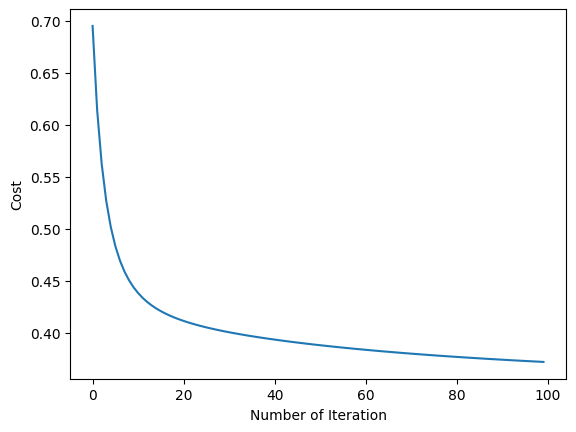

Manual Test Accuracy: 86.34%


In [ ]:
logistic_regression(xtrain,ytrain,xtest,ytest,1,100)

In [ ]:
_accuracies = {}
import sklearn
lr = LogisticRegression()
lr.fit(xtrain.T,ytrain.T)
_acc = lr.score(xtest.T,ytest.T)*100
_predictions = lr.predict(xtest.T)
print(sklearn.metrics.classification_report(ytest.T, _predictions))

_accuracies['Logistic Regression'] = _acc
print("Test Accuracy {:.2f}%".format(_acc))

              precision    recall  f1-score   support

           0       0.89      0.81      0.84        98
           1       0.84      0.91      0.87       107

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205

Test Accuracy 85.85%


# **KNN** **Classification**

In [ ]:
# KNN Model
import sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 11)  # n_neighbors means k
knn.fit(xtrain.T, ytrain.T)
prediction = knn.predict(xtest.T)
print(sklearn.metrics.classification_report(ytest.T, prediction))

print("{} NN Score: {:.2f}%".format(2, knn.score(xtest.T, ytest.T)*100))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        98
           1       0.88      0.92      0.90       107

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205

2 NN Score: 89.27%


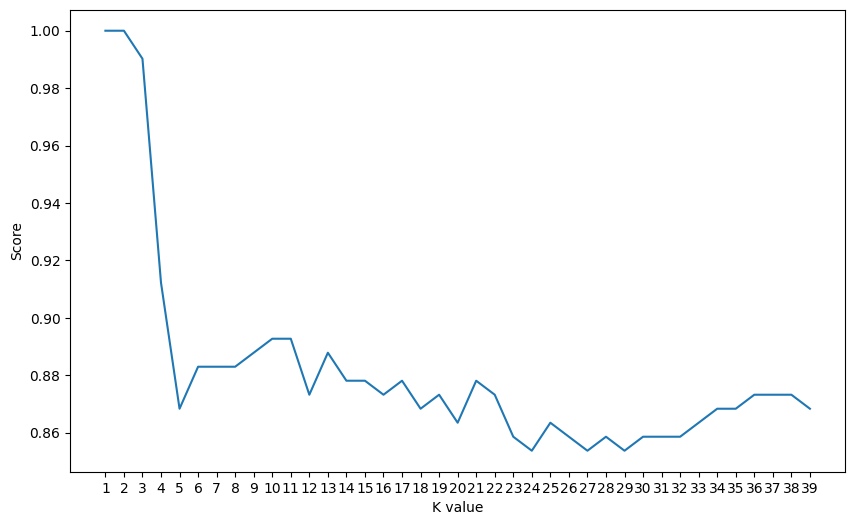

Maximum KNN Score is 100.00%


In [ ]:
# try ro find best k value
from matplotlib.pyplot import figure

figure(figsize=(10, 6))
score_list = []
for i in range(1,40):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(xtrain.T, ytrain.T)
    score_list.append(knn2.score(xtest.T, ytest.T))

_plot.plot(range(1,40), score_list)
_plot.xticks(np.arange(1,40,1))
_plot.xlabel("K value")
_plot.ylabel("Score")
_plot.show()

_acc = max(score_list)*100
_accuracies['KNN'] = _acc
print("Maximum KNN Score is {:.2f}%".format(_acc))

**SVM** **Algorithm**

In [ ]:
from sklearn.svm import SVC

_svm = SVC(random_state = 1)
_svm.fit(xtrain.T, ytrain.T)

_acc = _svm.score(xtest.T,ytest.T)*100
_xtest_new = xtest.T
_predictions = _svm.predict(_xtest_new)
print(sklearn.metrics.classification_report(ytest.T, _predictions))

_accuracies['SVM'] = _acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(_acc))
# print(sklearn.metrics.classification_report(ytest.T, prediction))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        98
           1       0.93      0.91      0.92       107

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205

Test Accuracy of SVM Algorithm: 91.71%


**Comparing** **Models**

<ipython-input-38-0f3ca57d0337>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(_accuracies.keys()), y=list(_accuracies.values()), palette=colors)
<ipython-input-38-0f3ca57d0337>:8: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(x=list(_accuracies.keys()), y=list(_accuracies.values()), palette=colors)


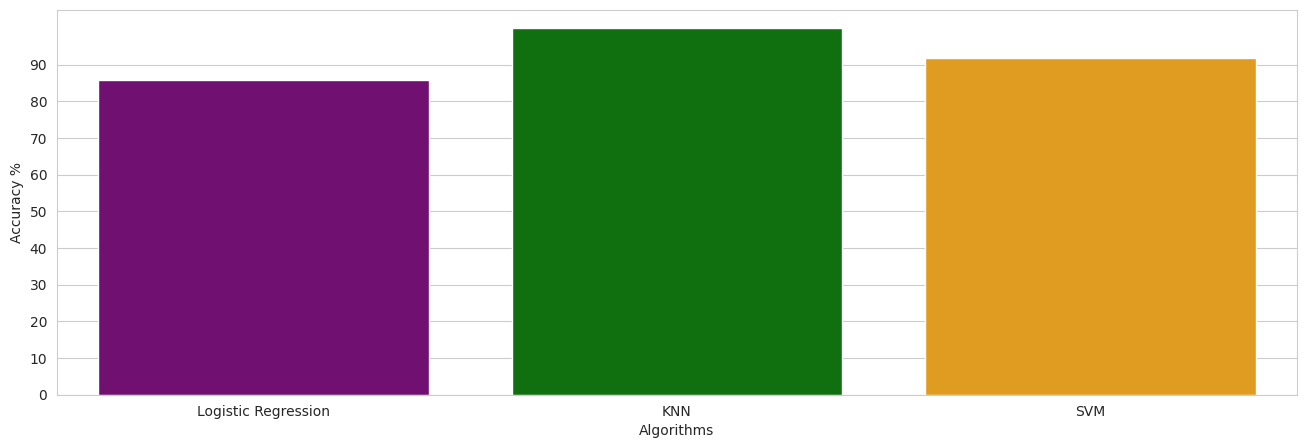

In [ ]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
_plot.figure(figsize=(16,5))
_plot.yticks(np.arange(0,100,10))
_plot.ylabel("Accuracy %")
_plot.xlabel("Algorithms")
sns.barplot(x=list(_accuracies.keys()), y=list(_accuracies.values()), palette=colors)
_plot.show()

**Confusion** **Matrix**

In [ ]:
# Predicted values
y_head_lr = lr.predict(xtest.T)
knn3 = KNeighborsClassifier(n_neighbors = 32)
knn3.fit(xtrain.T, ytrain.T)
y_head_knn = knn3.predict(xtest.T)
y_head_svm = _svm.predict(xtest.T)


In [ ]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(ytest,y_head_lr)
cm_knn = confusion_matrix(ytest,y_head_knn)
cm_svm = confusion_matrix(ytest,y_head_svm)


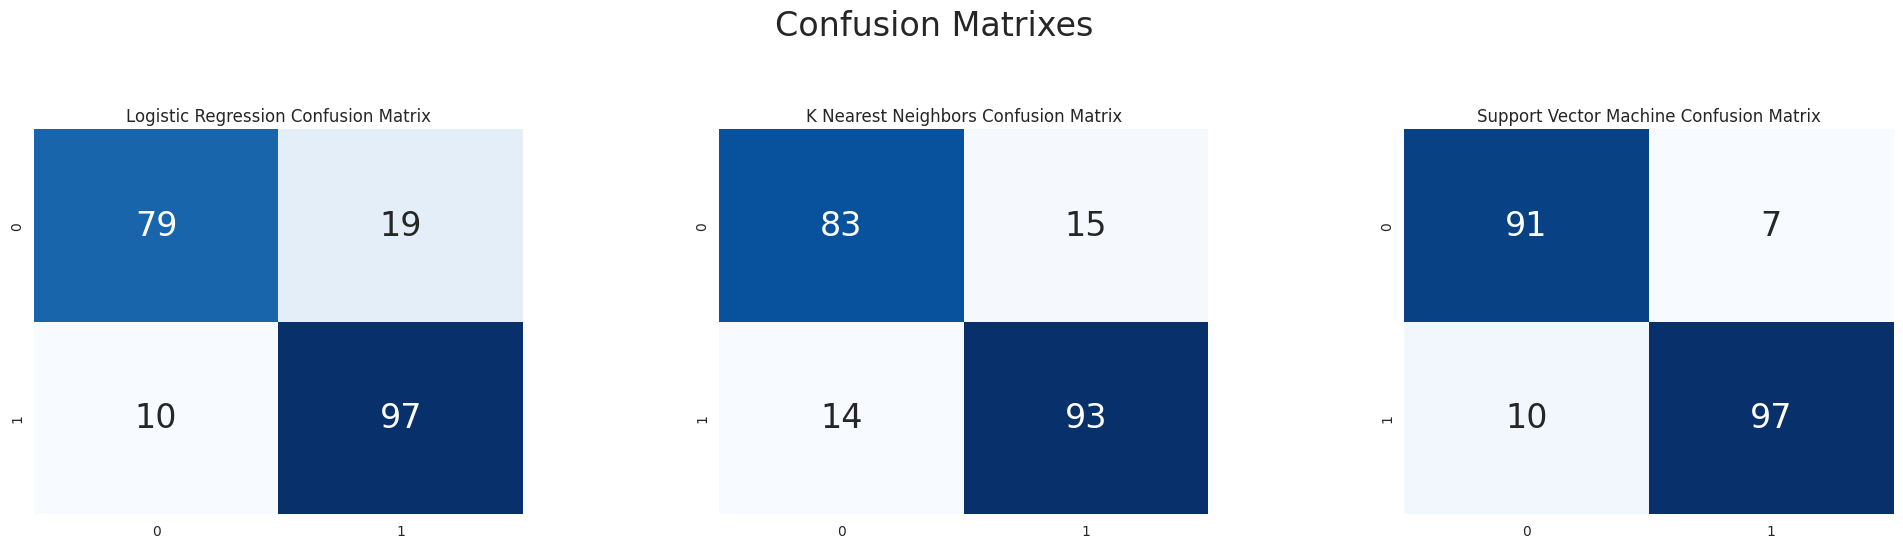

In [ ]:
_plot.figure(figsize=(24,12))

_plot.suptitle("Confusion Matrixes",fontsize=24)
_plot.subplots_adjust(wspace = 0.4, hspace= 0.4)

_plot.subplot(2,3,1)
_plot.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

_plot.subplot(2,3,2)
_plot.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

_plot.subplot(2,3,3)
_plot.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

_plot.show()